<a href="https://colab.research.google.com/github/chetankhairnar05/Colab/blob/main/p5_loanStatusPrediction_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns


In [2]:
df = pd.read_csv('/content/loanDataset.csv')
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [4]:
df.shape

(614, 13)

In [16]:
colms = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Credit_History', 'Property_Area', 'Loan_Status']
for col in colms:
  print(df[col].value_counts(dropna=False),end='\n\n')

Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64

Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64

Dependents
0      345
1      102
2      101
3+      51
NaN     15
Name: count, dtype: int64

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

Self_Employed
No     500
Yes     82
NaN     32
Name: count, dtype: int64

Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

Loan_Status
Y    422
N    192
Name: count, dtype: int64



In [17]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [18]:
df2 = df.dropna()

In [20]:
df2.shape

(480, 13)

In [21]:
df.dropna(subset= ['Married', 'Dependents', 'Credit_History'],inplace = True)
df.shape

(549, 13)

In [23]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,19
Loan_Amount_Term,13


In [24]:
df.dropna(inplace=True)

In [25]:
df.replace({'Dependents':{'3+':4}},inplace=True)
df.replace({'Married':{'Yes':1,'No':0}},inplace=True)
df.replace({'Gender':{'Male':1,'Female':0}},inplace=True)
df.replace({'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)
df.replace({'Self_Employed':{'Yes':1,'No':0}},inplace=True)
df.replace({'Property_Area':{'Urban':2,'Semiurban':1,'Rural':0}},inplace=True)
df.replace({'Loan_Status':{'Y':1,'N':0}},inplace=True)

for i in df.columns:
  print(df[i].value_counts(dropna=False),end='\n\n')

Loan_ID
LP002990    1
LP001003    1
LP001005    1
LP001006    1
LP001008    1
           ..
LP001024    1
LP001020    1
LP001018    1
LP001014    1
LP001013    1
Name: count, Length: 517, dtype: int64

Gender
1    424
0     93
Name: count, dtype: int64

Married
1    333
0    184
Name: count, dtype: int64

Dependents
0    295
2     92
1     85
4     45
Name: count, dtype: int64

Education
1    413
0    104
Name: count, dtype: int64

Self_Employed
0    448
1     69
Name: count, dtype: int64

ApplicantIncome
2500     8
4583     6
5000     5
2600     5
3750     5
        ..
11000    1
3125     1
4191     1
3858     1
150      1
Name: count, Length: 432, dtype: int64

CoapplicantIncome
0.0       232
2083.0      5
1666.0      5
2500.0      5
2333.0      3
         ... 
1000.0      1
2792.0      1
4301.0      1
1411.0      1
240.0       1
Name: count, Length: 243, dtype: int64

LoanAmount
110.0    16
120.0    16
100.0    13
187.0    12
113.0    10
         ..
146.0     1
292.0     1
142.0    

/tmp/ipython-input-25-4141839916.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Married':{'Yes':1,'No':0}},inplace=True)
/tmp/ipython-input-25-4141839916.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender':{'Male':1,'Female':0}},inplace=True)
/tmp/ipython-input-25-4141839916.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavio

<Axes: xlabel='Education', ylabel='count'>

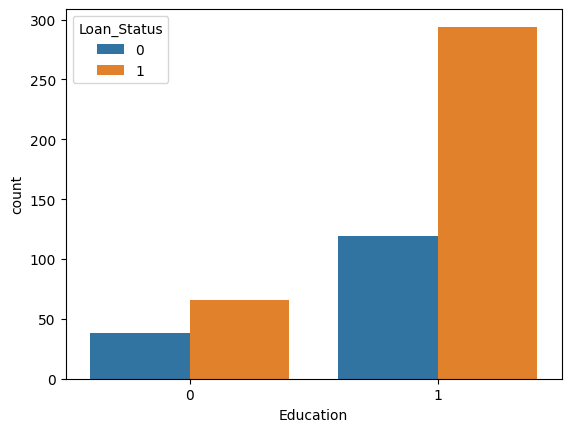

In [27]:
sns.countplot(x = 'Education', hue = 'Loan_Status',data = df)

<Axes: xlabel='Married', ylabel='count'>

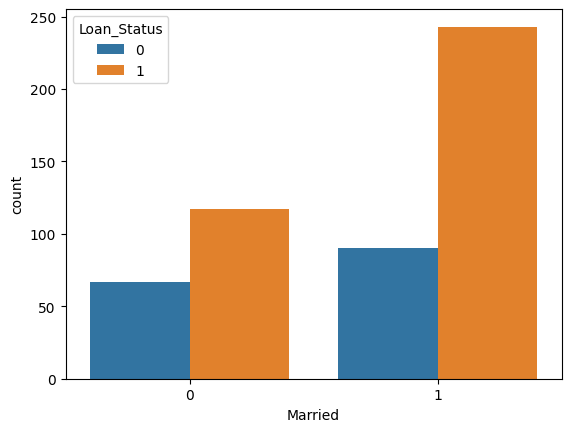

In [28]:
sns.countplot(x = 'Married', hue = 'Loan_Status',data = df)

In [29]:
x = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y = df['Loan_Status']

In [30]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.25,stratify=y,random_state=62)

In [31]:
model = svm.SVC(kernel='linear')
model.fit(x_train,y_train)

x_train_pred = model.predict(x_train)
train_acc = accuracy_score(x_train_pred,y_train)
print("train_acc: ",train_acc)

x_test_pred = model.predict(x_test)
test_acc = accuracy_score(x_test_pred,y_test)
print("test_acc: ",test_acc)

train_acc:  0.8010335917312662
test_acc:  0.7538461538461538
